<a href="https://colab.research.google.com/github/Sameersah/CMPE-255-2/blob/main/TimeSeries_Forcasting_using_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Pycaret

In [ ]:
!pip install pycaret[mlops]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.4 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

## Verify Installation

In [ ]:
import pycaret
pycaret.__version__

'3.3.2'

## Get Data

In [ ]:
from pycaret.datasets import get_data
data = get_data('energy')
data = data.iloc[:200]
len(data)


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


200

## Plot the data

<Axes: >

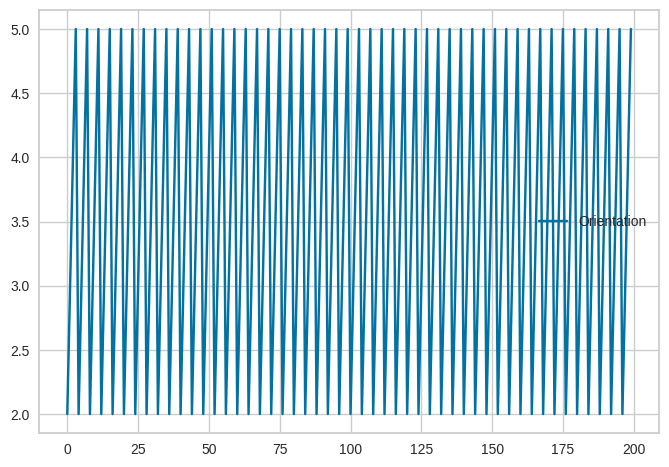

In [ ]:
data[['Orientation']].plot()

## Join Coloumns

In [ ]:
print(', '.join(data.columns))

Relative Compactness, Surface Area, Wall Area, Roof Area, Overall Height, Orientation, Glazing Area, Glazing Area Distribution, Heating Load, Cooling Load


## Forcasting

In [ ]:
from pycaret.time_series import *
s = setup(data, target='Orientation', fh = 10, session_id = 123)  # Forecasting horizon of 10 days

,Description,Value
0,session_id,123
1,Target,Orientation
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(200, 10)"
5,Transformed data shape,"(200, 10)"
6,Transformed train set shape,"(190, 10)"
7,Transformed test set shape,"(10, 10)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


## Import TSForecastingExperiment Algorithm

In [ ]:
from pycaret.time_series import TSForecastingExperiment
exp = TSForecastingExperiment()

In [ ]:
type(exp)

pycaret.time_series.forecasting.oop.TSForecastingExperiment

## Data Setup

In [ ]:
exp.setup(data, target='Orientation', fh = 10, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Orientation
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(200, 10)"
5,Transformed data shape,"(200, 10)"
6,Transformed train set shape,"(190, 10)"
7,Transformed test set shape,"(10, 10)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
## Check status

In [ ]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,200.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,3.5
3,Summary,Statistics,Transformed,Median,,3.5
4,Summary,Statistics,Transformed,Standard Deviation,,1.12084
5,Summary,Statistics,Transformed,Variance,,1.256281
6,Summary,Statistics,Transformed,Kurtosis,,-1.364012
7,Summary,Statistics,Transformed,Skewness,,0.0
8,Summary,Statistics,Transformed,# Distinct Values,,4.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",1628.608461


## Compare Model

In [ ]:
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
arima,ARIMA,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.9400
auto_arima,Auto ARIMA,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,4.2733
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.0667,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.5800
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.0667,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.4167
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.0667,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.6400
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.7333,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.8300
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,3.7333,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.4900
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,7.2667,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.4033
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,7.2667,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.4333
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,7.2667,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.3900


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
exp.compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
arima,ARIMA,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.3533
auto_arima,Auto ARIMA,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,4.2933
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.0667,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.5233
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.0667,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.4967
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.0667,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.3933
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.7333,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.8033
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,3.7333,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.5067
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,7.2667,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.4000
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,7.2667,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.3967
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,7.2667,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.4167


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

ARIMA(seasonal_order=(0, 1, 0, 4))

## Forcast

In [ ]:
plot_model(best, plot = 'forecast')

## Prediction

In [ ]:
pred_obj = predict_model(best)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,ARIMA,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000


In [ ]:
pred_obj.head()

,y_pred
190,4.0
191,5.0
192,2.0
193,3.0
194,4.0


## Save Model

In [ ]:
save_model(best, 'my_pipeline')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 ARIMA(seasonal_order=(0,
                                                                                       1,
                                                                                       0,
                                                                                       4)))]))]),
 'my_pipeline.pkl')


## Verify

In [ ]:
loaded_best_pipeline = load_model('my_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                ARIMA(seasonal_order=(0,
                                                                                      1,
                                                                                      0,
                                                                                      4)))]))])